<a href="https://colab.research.google.com/github/XIOZ119/colab/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ideal: 0.840
> folds=2, accuracy=0.740 (0.700, 0.780)
> folds=3, accuracy=0.749 (0.697, 0.824)
> folds=4, accuracy=0.790 (0.640, 0.920)
> folds=5, accuracy=0.810 (0.600, 0.950)
> folds=6, accuracy=0.820 (0.688, 0.941)
> folds=7, accuracy=0.799 (0.571, 1.000)
> folds=8, accuracy=0.811 (0.385, 0.923)
> folds=9, accuracy=0.829 (0.636, 1.000)
> folds=10, accuracy=0.850 (0.600, 1.000)
> folds=11, accuracy=0.829 (0.667, 1.000)
> folds=12, accuracy=0.785 (0.250, 1.000)
> folds=13, accuracy=0.839 (0.571, 1.000)
> folds=14, accuracy=0.807 (0.429, 1.000)
> folds=15, accuracy=0.821 (0.571, 1.000)
> folds=16, accuracy=0.827 (0.500, 1.000)
> folds=17, accuracy=0.816 (0.600, 1.000)
> folds=18, accuracy=0.831 (0.600, 1.000)
> folds=19, accuracy=0.826 (0.600, 1.000)


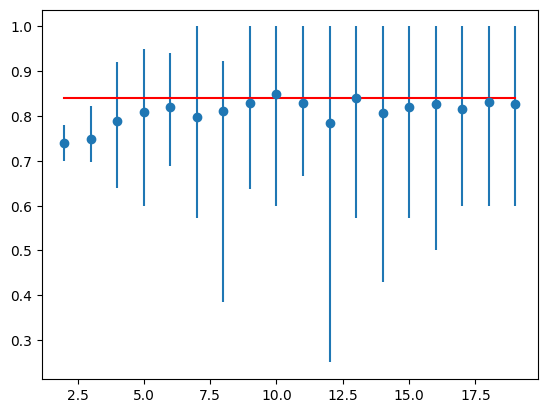

In [8]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

def evaluate_model(cv):
  X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
  model = LogisticRegression()
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return mean(scores), scores.min(), scores.max()

ideal, _, _ = evaluate_model(LeaveOneOut())
print('ideal: %.3f' %ideal)
folds = range(2,20)
means, mins, maxs = list(), list(), list()

for k in folds:
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    k_mean, k_min, k_max = evaluate_model(cv)
    print('> folds=%d, accuracy=%.3f (%.3f, %.3f)' % (k, k_mean, k_min, k_max))
    means.append(k_mean)
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
pyplot.plot(folds, [ideal for _ in range(len(folds))], color ='r')
pyplot.show()